In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
gender = pd.read_csv('titanic_data/gender_submission.csv')
t_df = pd.read_csv('titanic_data/train.csv')
test_df = pd.read_csv('titanic_data/test.csv')

In [3]:
t_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
t_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Age, Cabin and Embarked seems to have rows with null values in them. We might need to populate those rows later on.

In [5]:
t_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
t_df.drop('Fare', inplace=True, axis=1)
t_df.drop('Parch', inplace=True, axis=1)
t_df.drop('SibSp', inplace=True, axis=1)
t_df.describe()

,PassengerId,Survived,Pclass,Age
count,891.000000,891.000000,891.000000,714.000000
mean,446.000000,0.383838,2.308642,29.699118
std,257.353842,0.486592,0.836071,14.526497
min,1.000000,0.000000,1.000000,0.420000
25%,223.500000,0.000000,2.000000,20.125000
50%,446.000000,0.000000,3.000000,28.000000
75%,668.500000,1.000000,3.000000,38.000000
max,891.000000,1.000000,3.000000,80.000000


In [7]:
gender.head()
gender['Survived'].value_counts()

0    266
1    152
Name: Survived, dtype: int64

Now that we know how many females(266) and how many males(152) have survived, let's see if we can leverage the information to reach a conclusion.

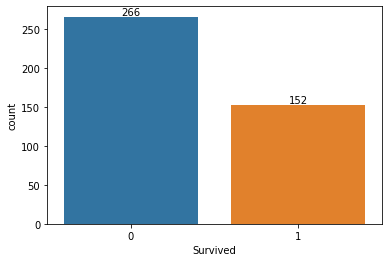

In [8]:
axis = sns.countplot(x='Survived', data=gender)
axis.bar_label(axis.containers[0])
plt.show()

In [9]:
t_df.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
Ticket         681
Cabin          147
Embarked         3
dtype: int64

In [10]:
t_df['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

216 1st class passengers, 184 2nd class passengers, 491 3rd class passengers

In [11]:
t_df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

342 passengers survived while 549 passengers died

In [12]:
#Replacing the null values with relevant ones
def clean(dt_):
    dt_['Age'] = dt_['Age'].replace(np.NaN, dt_['Age'].mean())
    dt_['Embarked'] = t_df['Embarked'].fillna(method='ffill')
    
    return dt_


t_df = clean(t_df)
test_df = clean(test_df)

t_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,373450,NaN,S


In [13]:
t_df.isnull().sum()
t_df.drop('Cabin', inplace=True, axis=1)

In [14]:
test_df.drop('Cabin', inplace=True, axis=1)
test_df.drop('Fare', inplace=True, axis=1)
test_df.drop('Parch', inplace=True, axis=1)
test_df.drop('SibSp', inplace=True, axis=1)

In [15]:
t_df.describe(), test_df.describe()

(       PassengerId    Survived      Pclass         Age
 count   891.000000  891.000000  891.000000  891.000000
 mean    446.000000    0.383838    2.308642   29.699118
 std     257.353842    0.486592    0.836071   13.002015
 min       1.000000    0.000000    1.000000    0.420000
 25%     223.500000    0.000000    2.000000   22.000000
 50%     446.000000    0.000000    3.000000   29.699118
 75%     668.500000    1.000000    3.000000   35.000000
 max     891.000000    1.000000    3.000000   80.000000,
        PassengerId      Pclass         Age
 count   418.000000  418.000000  418.000000
 mean   1100.500000    2.265550   30.272590
 std     120.810458    0.841838   12.634534
 min     892.000000    1.000000    0.170000
 25%     996.250000    1.000000   23.000000
 50%    1100.500000    3.000000   30.272590
 75%    1204.750000    3.000000   35.750000
 max    1309.000000    3.000000   76.000000)

In [16]:
def label(dt_):
    labelencoder= LabelEncoder()
    
    dt_['Sex']=labelencoder.fit_transform(dt_['Sex'])
    dt_['Embarked']=labelencoder.fit_transform(dt_['Embarked'])
    
    return dt_

t_df=label(t_df)
test_df=label(test_df)

t_df.head(), test_df.head()

(   PassengerId  Survived  Pclass  \
 0            1         0       3   
 1            2         1       1   
 2            3         1       3   
 3            4         1       1   
 4            5         0       3   
 
                                                 Name  Sex   Age  \
 0                            Braund, Mr. Owen Harris    1  22.0   
 1  Cumings, Mrs. John Bradley (Florence Briggs Th...    0  38.0   
 2                             Heikkinen, Miss. Laina    0  26.0   
 3       Futrelle, Mrs. Jacques Heath (Lily May Peel)    0  35.0   
 4                           Allen, Mr. William Henry    1  35.0   
 
              Ticket  Embarked  
 0         A/5 21171         2  
 1          PC 17599         0  
 2  STON/O2. 3101282         2  
 3            113803         2  
 4            373450         2  ,
    PassengerId  Pclass                                          Name  Sex  \
 0          892       3                              Kelly, Mr. James    1   
 1         

# Data Visualization

/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 29.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 13.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


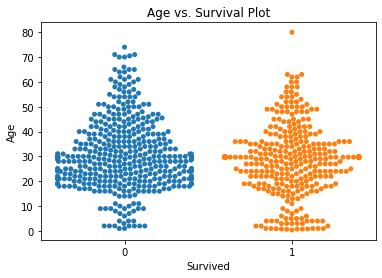

In [17]:
sns.swarmplot(x=t_df['Survived'], y=t_df['Age'])
plt.title('Age vs. Survival Plot')
plt.show()

According to the visulization most people died from the tragedy and the number of people who died is significant within the age range 18-32 years.

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

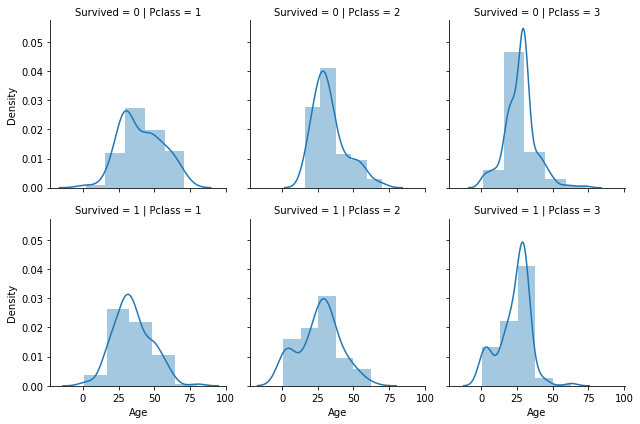

In [18]:
sns.FacetGrid(t_df, col='Pclass', row='Survived').map(sns.distplot, 'Age', bins=5)
plt.show()

We can somewhat make out that more Class 3 passengers died as opposed to Class 1 and Class 2. Infact, Class 1 has the highest 
survival rate.

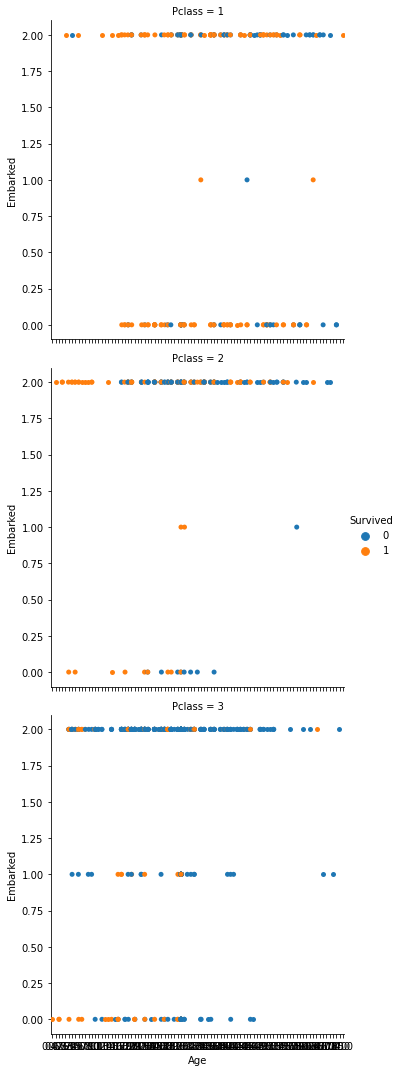

In [19]:
sns.catplot(x='Age', y='Embarked', hue='Survived', row='Pclass', data=t_df)
plt.show()

The 3rd Class had the highest death rate.

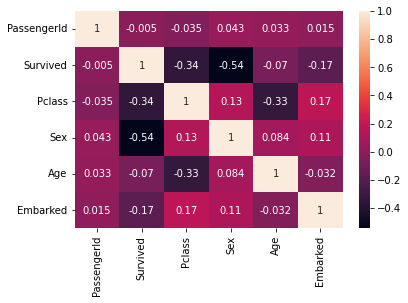

In [20]:
#correlation 
c = t_df.corr()
sns.heatmap(c, annot=True)
plt.show()

In [21]:
t_df.drop('Name', inplace=True, axis=1)
test_df.drop('Name', inplace=True, axis=1)

In [22]:
t_df.drop('Ticket', inplace=True, axis=1)
t_df.drop('PassengerId', inplace=True, axis=1)
test_df.drop('Ticket', inplace=True, axis=1)
t_df
test_df

,PassengerId,Pclass,Sex,Age,Embarked
0,892,3,1,34.50000,2
1,893,3,0,47.00000,0
2,894,2,1,62.00000,2
3,895,3,1,27.00000,2
4,896,3,0,22.00000,2
...,...,...,...,...,...
413,1305,3,1,30.27259,2
414,1306,1,0,39.00000,2
415,1307,3,1,38.50000,2
416,1308,3,1,30.27259,2


# Training the myModel

In [23]:
from sklearn.myModel_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_myModel import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, precision_score, recall_score, roc_auc_score

X_train = t_df.drop('Survived', axis=1)
Y_train = t_df['Survived']
X_test = test_df.drop('PassengerId', axis=1).copy()

#Logistic Regression
logReg = LogisticRegression()
logReg.fit(X_train, Y_train)
Y_pred = logReg.predict(X_test)
logRegModel = round(logReg.score(X_train, Y_train) * 100, 2)
logRegModel

#knc
knc = KNeighborsClassifier(n_neighbors = 4)
knc.fit(X_train, Y_train)
Y_pred = knc.predict(X_test)
acc_knc = round(knc.score(X_train, Y_train) * 100, 2)
acc_knc

#SVM
svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
acc_svc

print(Y_pred)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0]


In [24]:
myModel = pd.DataFrame({'myModel':['Logistic Regression', 'knc', 'Support Vector Machines'],
                     'Score': [logRegModel, acc_knc, acc_svc]})
myModel.sort_values(by = 'Score', ascending = False)

,Model,Score
1,KNN,83.61
0,Logistic Regression,79.01
2,Support Vector Machines,63.41


In [25]:
prediction = pd.DataFrame({'PassengerId' : test_df['PassengerId'], 'Survived': Y_pred})
prediction

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,0
415,1307,0
416,1308,0
